**Dataset URL:** https://drive.google.com/drive/folders/1K5PT6GCzCodnuKIlJguzxVk3Kke35SGC?usp=drive_link

# **Singular Vector Decomposition**

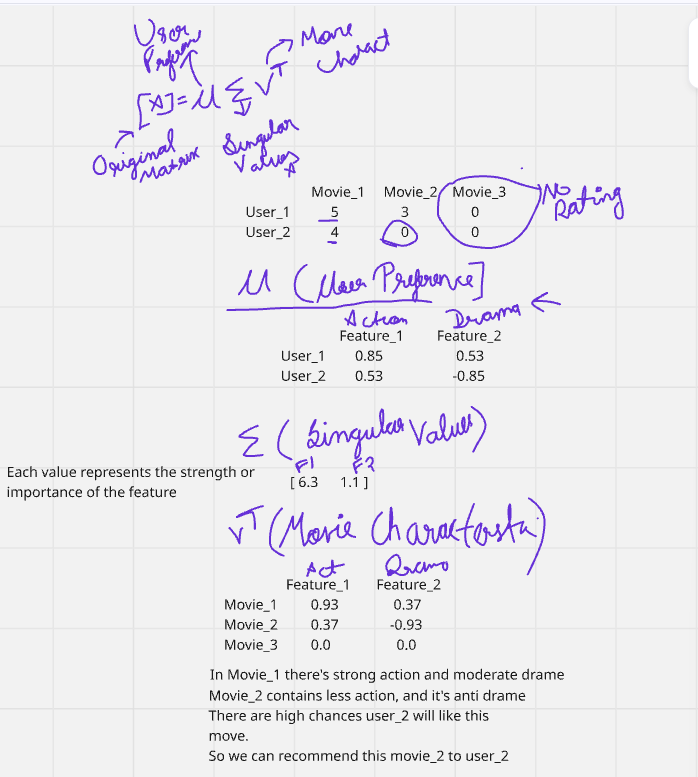

In [ ]:
# ! pip install numpy==1.23.5

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/NetflixDataset/combinedNetflixData.txt',header=None,usecols=[0,1],names=['CustID','Ratings'])
df

,CustID,Ratings
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [ ]:
# Let's check all the movie id's present in our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   CustID   object 
 1   Ratings  float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [ ]:
df[df['CustID'].str.contains(':')]  # Looking at all the movie id's

,CustID,Ratings
0,1:,NaN
548,2:,NaN
694,3:,NaN
2707,4:,NaN
2850,5:,NaN
...,...,...
24046714,4495:,NaN
24047329,4496:,NaN
24056849,4497:,NaN
24057564,4498:,NaN


In [ ]:
movie_count = df[df['CustID'].str.contains(':')].count()[0]
movie_count

/tmp/ipython-input-76-4266916273.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  movie_count = df[df['CustID'].str.contains(':')].count()[0]


4499

In [ ]:
movie_count

4499

In [ ]:
# Number of unique customer id's from our data.
cust_count = df['CustID'].nunique()
cust_count
# In this data we also have movie_id's as well

475257

In [ ]:
cust_count = cust_count - movie_count
cust_count

470758

In [ ]:
# Total number of ratings in our given data
ratings_count = len(df)-movie_count
ratings_count

24053764

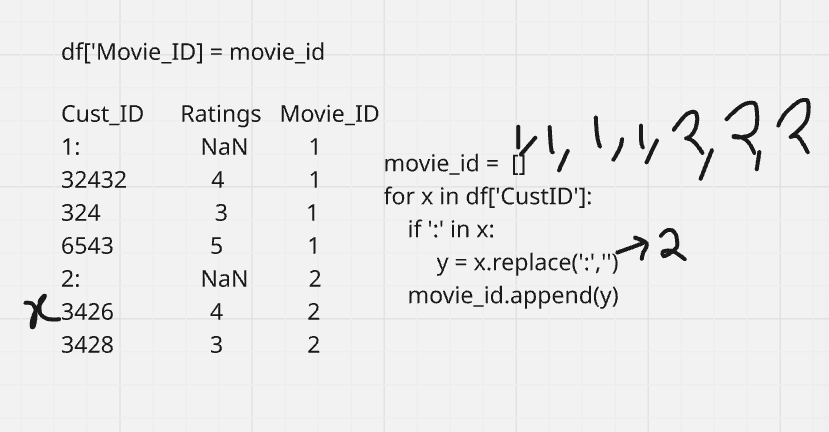

In [ ]:
movie_id =  []
for x in df['CustID']:
    if ':' in x:
     y = x.replace(':','')
    movie_id.append(y)

In [ ]:
movie_id

['1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1'

In [ ]:
df['MovieID'] = movie_id
df

,CustID,Ratings,MovieID
0,1:,NaN,1
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [ ]:
df.dropna(inplace=True)

In [ ]:
df

,CustID,Ratings,MovieID
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   CustID   object 
 1   Ratings  float64
 2   MovieID  object 
dtypes: float64(1), object(2)
memory usage: 734.1+ MB


In [ ]:
df['CustID'] = df['CustID'].astype(int)
df['MovieID'] = df['MovieID'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   CustID   int64  
 1   Ratings  float64
 2   MovieID  int64  
dtypes: float64(1), int64(2)
memory usage: 734.1 MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
# Manual Filtration

# We need to select the users who have rated good amount of movies.

# We need to get the count of every customer with respect to ratings..
data_cust_summary = df.groupby('CustID')['Ratings'].count()
data_cust_summary

# cust_id and the number of movies that have rated.

,Ratings
CustID,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [ ]:
cust_benchmark = round(data_cust_summary.quantile(0.60))
cust_benchmark

36

In [ ]:
a = pd.Series([10,20,30,40,50],index=['A','B','C','D','E'])
a.index

Index(['A', 'B', 'C', 'D', 'E'], dtype='object')

In [ ]:
data_cust_summary[data_cust_summary<cust_benchmark]  # Rejected Customer_ID

,Ratings
CustID,
8,21
25,4
33,11
83,10
94,27
...,...
2649384,7
2649401,30
2649404,12


In [ ]:
Rejected_cust = data_cust_summary[data_cust_summary<cust_benchmark].index
Rejected_cust  #All the rejected customers ids

Index([      8,      25,      33,      83,      94,     126,     130,     133,
           142,     149,
       ...
       2649337, 2649343, 2649351, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int64', name='CustID', length=282042)

In [ ]:
df[df['CustID'].isin(Rejected_cust)]  #Rejected Data

,CustID,Ratings,MovieID
7,124105,4.0,1
10,2238063,3.0,1
11,1503895,4.0,1
24,2165002,4.0,1
28,814701,5.0,1
...,...,...,...
24058231,692418,3.0,4499
24058234,1960927,1.0,4499
24058241,307404,2.0,4499
24058246,2368103,2.0,4499


In [ ]:
df = df[~df['CustID'].isin(Rejected_cust)]    # Cleaning the data (Removing the less useful CustID)

In [ ]:
df['CustID'].value_counts()

,count
CustID,
305344,4467
387418,4422
2439493,4195
1664010,4019
2118461,3769
...,...
2052654,36
2535353,36
1259193,36


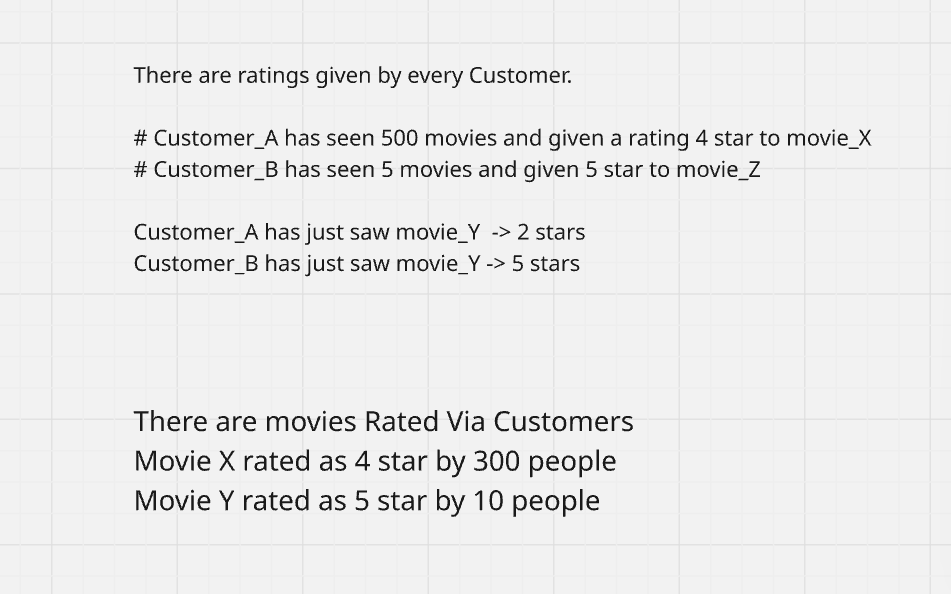

In [ ]:
# Filtering our movie data
# We need to select count of rating for every movieID

data_movie_summary = df.groupby('MovieID')['Ratings'].count()
data_movie_summary

,Ratings
MovieID,
1,439
2,93
3,1699
4,108
5,869
...,...
4495,527
4496,8488
4497,631


In [ ]:
movie_benchmark = round(data_movie_summary.quantile(0.60))
movie_benchmark

786

In [ ]:
Rejected_movies = data_movie_summary[data_movie_summary<movie_benchmark].index
Rejected_movies

Index([   1,    2,    4,    7,    9,   10,   11,   12,   13,   14,
       ...
       4480, 4481, 4486, 4487, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='MovieID', length=2699)

In [ ]:
df = df[~df['MovieID'].isin(Rejected_movies)]
df['MovieID'].value_counts()

,count
MovieID,
1905,142993
2452,121278
571,120186
4306,119073
3860,118609
...,...
1006,790
2689,788
1893,787


In [ ]:
df

,CustID,Ratings,MovieID
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3
...,...,...,...
24056842,1055714,5.0,4496
24056843,2643029,4.0,4496
24056844,267802,4.0,4496
24056845,1559566,3.0,4496


In [ ]:
df_title = pd.read_csv('/content/drive/MyDrive/NetflixDataset/NetflixMovieData.csv',header=None,usecols=[0,1,2],names=['MovieID','Year','Name'])
df_title

,MovieID,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17764,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17765,17767,2004.0,Fidel Castro: American Experience
17766,17768,2000.0,Epoch
17767,17769,2003.0,The Company


In [ ]:
# !pip install numpy==1.23.5

In [ ]:
! pip install Scikit-surprise # If this gives you error uncomment the previous cell run it comment it and then rull all the cells.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for Scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2469541 sha256=d3f3dddebb280982335b846320319c96f0a091c40f7f06f1bb8e301e4280fd54
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built Scikit-surprise


In [ ]:
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [ ]:
reader = Reader()

In [ ]:
data = Dataset.load_from_df(df[['CustID','MovieID','Ratings']][:100000],reader)
# reader will make sure that your data contains ratings (Which are the preferences given via users)

In [ ]:
data # An Object

In [ ]:
class Main:
    def __init__(self):
        print('Hello')

ob = Main()
ob

Hello


In [ ]:
model = SVD()

In [ ]:
cross_validate(model,data,measures=['RMSE'],cv=3)
# Fitting the data and building the model.

{'test_rmse': array([1.01855969, 1.01677292, 1.02323818]),
 'fit_time': (2.0586912631988525, 2.1117522716522217, 2.553792953491211),
 'test_time': (0.27501678466796875, 0.2805514335632324, 2.356036901473999)}

In [ ]:
# I want to do movie recommendation for user:
user_1331154 = df_title.copy()
user_1331154

,MovieID,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17764,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17765,17767,2004.0,Fidel Castro: American Experience
17766,17768,2000.0,Epoch
17767,17769,2003.0,The Company


In [ ]:
user_1331154['Estimate Score'] = user_1331154['MovieID'].apply(lambda x : model.predict(1331154,x).est)  #est is estimate ratings

In [ ]:
user_1331154.sort_values(by='Estimate Score',ascending=False)

,MovieID,Year,Name,Estimate Score
32,33,2000.0,Aqua Teen Hunger Force: Vol. 1,4.847701
222,223,2003.0,Chappelle's Show: Season 1,4.535716
67,68,2004.0,Invader Zim,4.508703
240,241,1959.0,North by Northwest,4.453210
269,270,2001.0,Sex and the City: Season 4,4.410604
...,...,...,...,...
180,181,2004.0,The Last Shot,2.781544
76,77,1995.0,Congo,2.680745
121,122,2002.0,Cube 2: Hypercube,2.649190
126,127,1987.0,Fatal Beauty,2.643474


In [ ]:
df['CustID']

,CustID
696,712664
697,1331154
698,2632461
699,44937
700,656399
...,...
24056842,1055714
24056843,2643029
24056844,267802
24056845,1559566


In [ ]:
user_44937 = df_title.copy()
user_44937

,MovieID,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17764,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17765,17767,2004.0,Fidel Castro: American Experience
17766,17768,2000.0,Epoch
17767,17769,2003.0,The Company


In [ ]:
user_44937['Estimate Score'] = user_44937['MovieID'].apply(lambda x : model.predict(44937,x).est)  #est is estimate ratings

In [ ]:
user_44937.sort_values(by='Estimate Score',ascending=False)

,MovieID,Year,Name,Estimate Score
269,270,2001.0,Sex and the City: Season 4,4.389770
32,33,2000.0,Aqua Teen Hunger Force: Vol. 1,4.240568
240,241,1959.0,North by Northwest,4.236551
222,223,2003.0,Chappelle's Show: Season 1,4.229374
75,76,1952.0,I Love Lucy: Season 2,4.199563
...,...,...,...,...
25,26,2004.0,Never Die Alone,2.797276
88,89,2000.0,Chain of Command,2.765365
224,225,2004.0,The Cookout,2.750863
126,127,1987.0,Fatal Beauty,2.697509


In [ ]:
# Precision: Out of all the movies we recommended to the user
# how many did the user actually like.

# Recall: Out of all the movies user liked, how many did our system recommend.

In [ ]:
from surprise.model_selection import train_test_split

In [ ]:
train, test = train_test_split(data,test_size = 0.25)

In [ ]:
model = SVD()
model.fit(train)

In [ ]:
predictions = model.test(test)

In [ ]:
from collections import defaultdict

In [ ]:
est_true = defaultdict(list)

In [ ]:
def precision_recall(predictions,k=10,threshold=3.5):  #k=10 top_10_recommendation, threshold = 3.5 (Checking for movies having ratings greater than 3.5)
    est_true = defaultdict(list)
    for x in predictions:
        est_true[x.uid].append((x.est,x.r_ui))
  #est_true will store all estimated and actual ratings paris for each user

    precision = []
    recalls = []

    for user_id, user_ratings in est_true.items(): # This will go through key and value
        user_ratings.sort(key=lambda x: x[0], reverse=True) #Sorting user predicted ratings
        top_k_ratings = user_ratings[:k]  # x[0] is the predicted rating(est)
        # This top_k_ratings will contains K movies that the system believers the user will like the most.

    # Now we will count how many top-K are actually good (Greater than threshold)
        relevant_movies = 0 #For all the movies this user actually rated, calculating the count
        for _, true_ratings in user_ratings:
            if true_ratings >=threshold:
                # These are good actual movies
                relevant_movies+=1  #Getting the count of actual top rated movies by user.

        predicted_as_liked = 0  # Here we will get the count of all the movies that were estimated by our model as greater than 3.5 ratings
        for est_rating, _ in top_k_ratings:
            if est_rating>=threshold:
                predicted_as_liked+=1

        relevant_predicted = 0 #Total count of movies that were actually greater than 3.5 and estimated greater than 3.5
        for est_rating, true_rating in top_k_ratings:
            if est_rating >= threshold and true_rating >= threshold:
                relevant_predicted +=1


        if predicted_as_liked!=0:
            prec = relevant_predicted/predicted_as_liked
        else:
            prec = 0



        if relevant_movies!=0:
            rec = relevant_predicted/relevant_movies
        else:
            rec = 0

        precision.append(prec)
        recalls.append(rec)

    avg_precision = sum(precision)/len(precision)
    avg_recall = sum(recalls)/len(recalls)

    return avg_precision, avg_recall



In [ ]:
precision , recall = precision_recall(predictions,k=10,threshold=3.5)
print(precision)
print(recall)

0.4824520122072958
0.4846767063118565


In [ ]:
# 48% Precision means
# Out of top 10 movies recommended to the user
# around 50% these movies were actually liked by the user

# 48% Recall
# Out of all the movies that user liked
# aroung 48% were successfully recommended in top 10.